# Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’

In this notebook, we're going to go through an example exploratory data anlysis on ‘Indian Premier League’ Data.

To work through these topics, we'll use pandas, Matplotlib , Seaborn, and NumPy for data anaylsis.

## 1. Problen Defination

Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’. As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.

## 2. Data

Taking the data from ("https://drive.google.com/file/d/18iDDIIZGt8eWxzqbyMIqcn5X7bHINuLw/view").

In [2]:
# Import the data tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1]:
import warnings
def ignore_warn(*args, **kwargs):
    pass
warning_warn = ignore_warn          # ignore warning(from sklearn and seaborn)

In [3]:
import os
print(os.listdir("."))              # for accessing folder and  file easily

['.ipynb_checkpoints', 'Create a Decision Tree Classifier .ipynb', 'deliveries.csv', 'EDA ON SUPER STORE.ipynb', 'Forecast the optimal number of Clusters.ipynb', 'Iris.csv', 'matches.csv', 'Prediction of percentage .ipynb', 'SampleSuperstore.csv', 'StudentsScore.csv', 'tree.dot', 'tree.png', 'Untitled.ipynb']


In [4]:
# Set the style of seaborn plot
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (14, 8)

In [11]:
# Read the Data Set file
df = pd.read_csv("matches.csv")

In [32]:
# Check the duplicated rows occure in DS
df.duplicated().sum()

0

In [12]:
df.head().transpose()

,0,1,2,3,4
id,1,2,3,4,5
season,2017,2017,2017,2017,2017
city,Hyderabad,Pune,Rajkot,Indore,Bangalore
date,2017-04-05,2017-04-06,2017-04-07,2017-04-08,2017-04-08
team1,Sunrisers Hyderabad,Mumbai Indians,Gujarat Lions,Rising Pune Supergiant,Royal Challengers Bangalore
team2,Royal Challengers Bangalore,Rising Pune Supergiant,Kolkata Knight Riders,Kings XI Punjab,Delhi Daredevils
toss_winner,Royal Challengers Bangalore,Rising Pune Supergiant,Kolkata Knight Riders,Kings XI Punjab,Royal Challengers Bangalore
toss_decision,field,field,field,field,bat
result,normal,normal,normal,normal,normal
dl_applied,0,0,0,0,0


In [13]:
# Shape of Data set
df.shape

(756, 18)

In [14]:
# Information about each columns(type, any null values present in data set or not)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [52]:
# Check the which has null(NaN) value
df.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [54]:
# Drop the most null value column because this is not useful for us
df.drop('umpire3', axis=1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


In [55]:
# Description about Data Set
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


### Matches count in Data Set

In [56]:

df['id'].count()

756

### How many seasons we have in data set

In [57]:

df['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [58]:
# No of seasons
df['season'].nunique()

12

## Maximum no. of matches won per seasons

In [59]:
team_per_season = df.groupby('season')['winner'].value_counts()
team_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [65]:
year = 2008
won_per_season = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in team_per_season.iteritems():    
    if items[0][0]==year:
        print(items)
        win_matches = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        won_per_season= won_per_season.append(win_matches)
        year += 1

((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Daredevils'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 12)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Mumbai Indians'), 11)


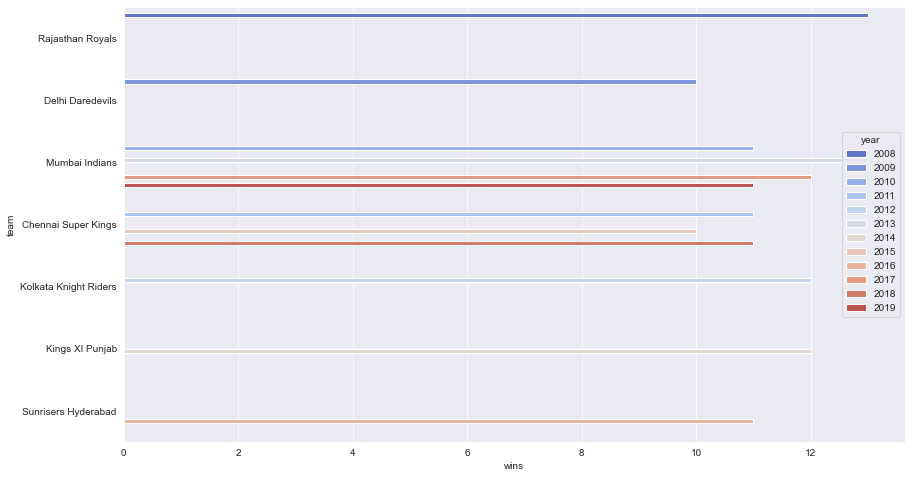

In [66]:
sns.barplot('wins', 'team', hue='year', data=won_per_season, palette='coolwarm')

### which team won by the maiximum runs

In [21]:
 
df.iloc[df['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

### which team had won by maximum runs

In [22]:
df.iloc[df['win_by_runs'].idxmax()]['winner']                           

'Mumbai Indians'

### which team had won by maximum wickets

In [23]:
df.iloc[df['win_by_wickets'].idxmax()]['winner']                        

'Kolkata Knight Riders'

 ### which team had won by minimum runs

In [24]:
df.iloc[df[df['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']     

'Mumbai Indians'

 ### which team had won by minimum runs

In [25]:
df.iloc[df[df['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]      

id                                   560
season                              2015
city                             Kolkata
date                          2015-05-09
team1                    Kings XI Punjab
team2              Kolkata Knight Riders
toss_winner              Kings XI Punjab
toss_decision                        bat
result                            normal
dl_applied                             0
winner             Kolkata Knight Riders
win_by_runs                            0
win_by_wickets                         1
player_of_match               AD Russell
venue                       Eden Gardens
umpire1                     AK Chaudhary
umpire2                  HDPK Dharmasena
umpire3                              NaN
Name: 559, dtype: object

## Number of matches of each seasons

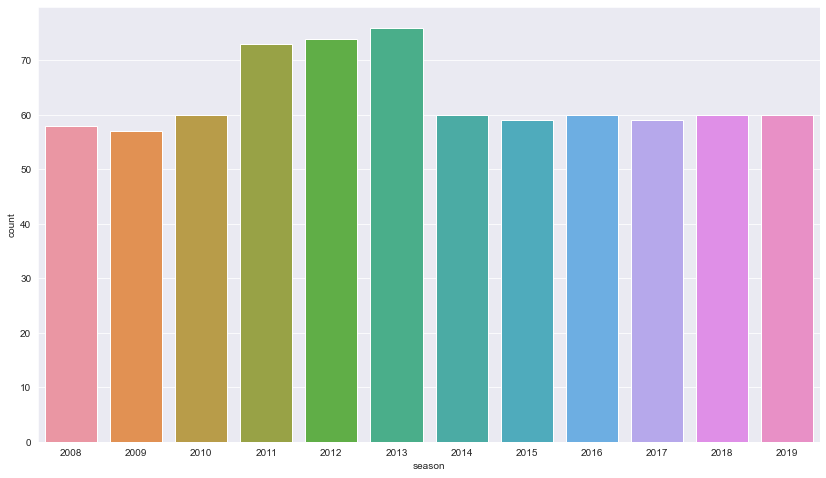

In [27]:

sns.countplot(x='season', data=df)
plt.show()

## Most successful team

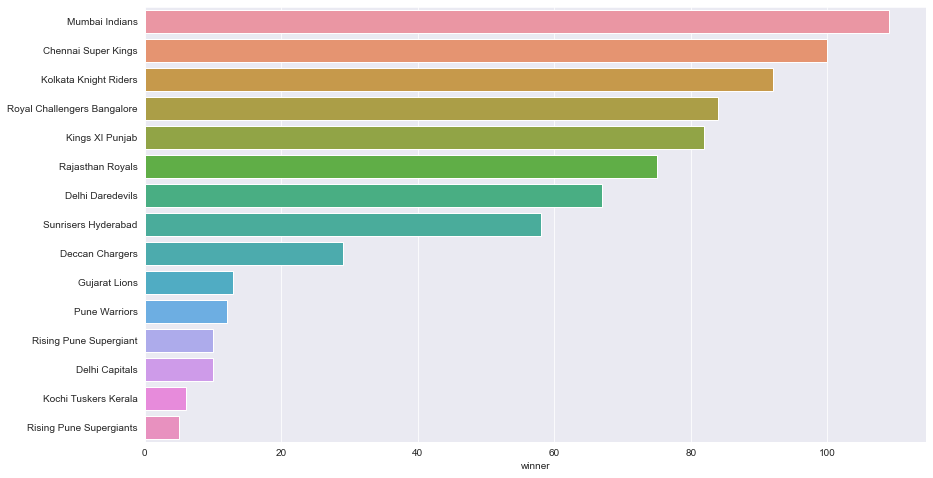

In [31]:
data = df.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h')

### Top player of the match Winners

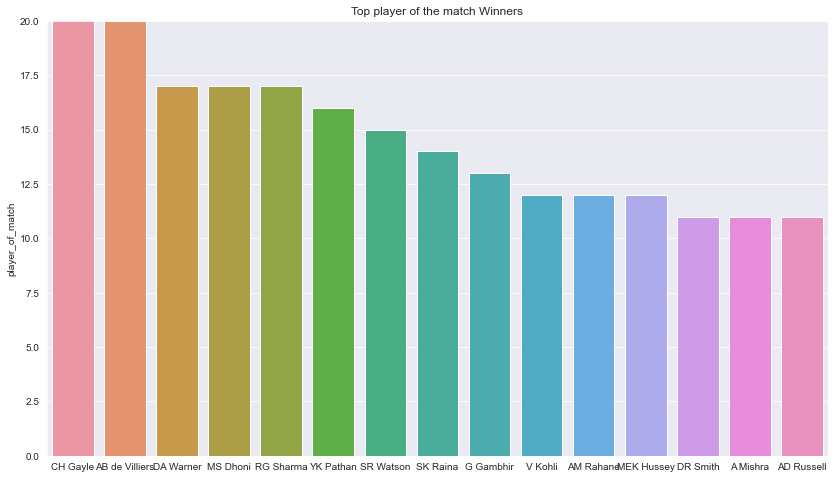

In [76]:
top_players = df.player_of_match.value_counts()[:15]
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
#top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v'); 
plt.show()

In [34]:
df.head().transpose()

,0,1,2,3,4
id,1,2,3,4,5
season,2017,2017,2017,2017,2017
city,Hyderabad,Pune,Rajkot,Indore,Bangalore
date,2017-04-05,2017-04-06,2017-04-07,2017-04-08,2017-04-08
team1,Sunrisers Hyderabad,Mumbai Indians,Gujarat Lions,Rising Pune Supergiant,Royal Challengers Bangalore
team2,Royal Challengers Bangalore,Rising Pune Supergiant,Kolkata Knight Riders,Kings XI Punjab,Delhi Daredevils
toss_winner,Royal Challengers Bangalore,Rising Pune Supergiant,Kolkata Knight Riders,Kings XI Punjab,Royal Challengers Bangalore
toss_decision,field,field,field,field,bat
result,normal,normal,normal,normal,normal
dl_applied,0,0,0,0,0


### Which venue had conducted maximum number of matches

In [72]:
venue_count = df['venue'].value_counts()
venue_count

Eden Gardens                                            77
M Chinnaswamy Stadium                                   73
Wankhede Stadium                                        73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Brabourne Stadium                                       11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     

In [70]:
(df['venue']=='Eden Gardens').sum()

77

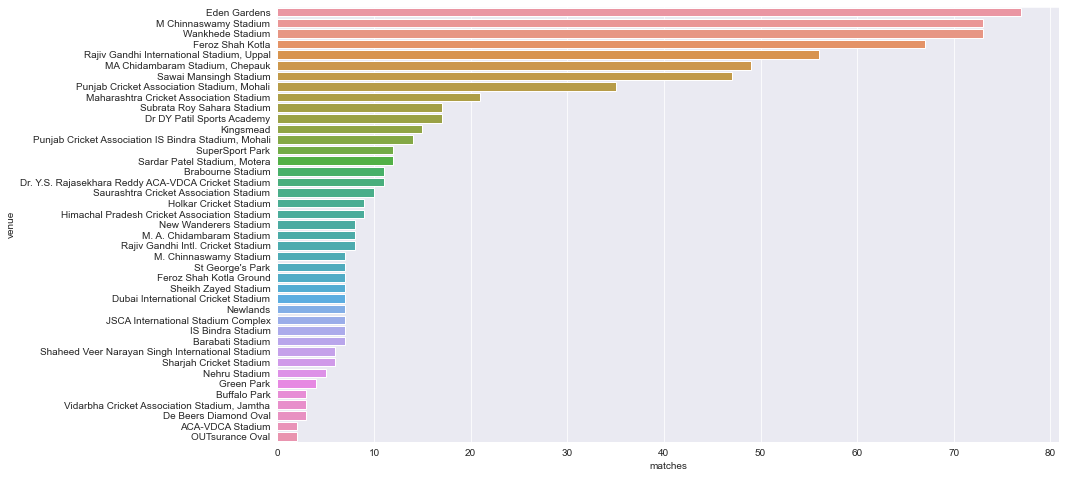

In [74]:
venue = pd.DataFrame(columns=['venue', 'matches'])
for items in venue_count.iteritems():
    temp_df = pd.DataFrame({
        'venue':[items[0]],
        'matches':[items[1]]
    })
    venue = venue.append(temp_df, ignore_index=True)
sns.barplot('matches','venue',data=venue)

### How many matches decided by the D/L Method

In [51]:
df['dl_applied'].sum()
#(df['dl_applied']>0).sum()

19

### Team who won the maximum number of toss

In [75]:
toss_win = df['toss_winner'].value_counts()
toss_win

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64